In [56]:
import pandas as pd
import sqlite3
import math
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import Image
plt.style.use('fivethirtyeight')


koneksi = sqlite3.connect('database.db')
cursor = koneksi.cursor()


# Desain Database
<img src="database.png">


In [57]:
#pembuatan Database

cursor.executescript('drop table if exists customer')
cursor.executescript('drop table if exists cabang')
cursor.executescript('drop table if exists produk')
cursor.executescript('drop table if exists penjualan')

cursor.execute("CREATE TABLE IF NOT EXISTS 'customer' ('id_customer' INT, 'jenis_customer' VARCHAR(50) NULL, 'gender_costumer' VARCHAR(50) NULL, PRIMARY KEY ('id_customer'))")
cursor.execute("CREATE TABLE IF NOT EXISTS 'cabang' ('id_cabang' INT, 'cabang' VARCHAR(50) NULL, 'lokasi_cabang' VARCHAR(50), PRIMARY KEY ('id_cabang'))")
cursor.execute("CREATE TABLE IF NOT EXISTS 'produk' ('id_produk' INT, 'id_cabang' INT, 'product_line' VARCHAR(50) NULL, 'harga' FLOAT NULL, 'rating' FLOAT NULL, PRIMARY KEY ('id_produk'),  FOREIGN KEY ('id_cabang') REFERENCES 'cabang' ('id_cabang') ON DELETE NO ACTION ON UPDATE NO ACTION)")
cursor.execute("CREATE TABLE IF NOT EXISTS 'penjualan' ('id_penjualan' INT, 'id_customer' INT, 'id_produk' INT, 'tanggal_transaksi' DATE NULL, 'jumlah_pembelian' INT(50) NULL, 'jenis_pembayaran' VARCHAR(50) NULL, 'cogs' INT, 'grossmargin' INT, PRIMARY KEY ('id_penjualan'), FOREIGN KEY ('id_customer') REFERENCES 'customer' ('id_customer') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('id_produk') REFERENCES 'produk' ('id_produk') ON DELETE NO ACTION ON UPDATE NO ACTION)")



In [58]:
dfs = pd.read_csv("datasets_supermarket.csv")
dfs.dtypes
dfs



,Invoice ID,Branch,City,Customer type,Gender,Productline,Unitprice,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,grossmargin percentage,grossincome,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1.0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3.0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3.0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1.0
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,1.0
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,3.0
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,2.0
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,2.0


In [59]:
customer = []
cabang = []
produk = []

for i,j in dfs.iterrows():
    if [j[1], j[2]] not in enumerate(cabang):
        cabang.append([j[1],j[2]])
        
    if [j[5],j[6], j[16], j[2]] not in enumerate(produk):
        produk.append([j[5],j[6],j[16],j[2]])
    
    if [j[3],j[4]] not in enumerate(customer):
        customer.append([j[3],j[4]])
    

# print(customer)
#print(cabang)
# print(produk)

penjualan = []
for i,j in dfs.iterrows():   
    c = -1
    for index, value in enumerate(customer):
        if value[0] == j[3]:
            c = index+1
#             print(value[0])
            break
            
    p = -1
    for index, value in enumerate(produk):
        if value[0] == j[5]:
            print(value[0])
            p = index+1
            break
    

            
    penjualan.append([datetime.datetime.strptime(j[10], '%m/%d/%Y').strftime('%Y-%m-%d'),j[7],j[12],j[14],j[15], c, p]) 

#print(penjualan)

Health and beauty
Electronic accessories
Home and lifestyle
Health and beauty
Sports and travel
Electronic accessories
Electronic accessories
Home and lifestyle
Health and beauty
Food and beverages
Fashion accessories
Electronic accessories
Electronic accessories
Food and beverages
Health and beauty
Sports and travel
Health and beauty
Sports and travel
Food and beverages
Home and lifestyle
Electronic accessories
Health and beauty
Home and lifestyle
Electronic accessories
Sports and travel
Home and lifestyle
Fashion accessories
Fashion accessories
Food and beverages
Health and beauty
Fashion accessories
Sports and travel
Sports and travel
Health and beauty
Food and beverages
Sports and travel
Sports and travel
Electronic accessories
Health and beauty
Home and lifestyle
Home and lifestyle
Home and lifestyle
Sports and travel
Food and beverages
Health and beauty
Electronic accessories
Health and beauty
Food and beverages
Electronic accessories
Fashion accessories
Food and beverages
Food a

Food and beverages
Home and lifestyle
Fashion accessories
Sports and travel
Sports and travel
Electronic accessories
Fashion accessories
Fashion accessories
Health and beauty
Electronic accessories
Electronic accessories
Home and lifestyle
Fashion accessories
Food and beverages
Food and beverages
Home and lifestyle
Electronic accessories
Food and beverages
Electronic accessories
Electronic accessories
Fashion accessories
Food and beverages
Sports and travel
Fashion accessories
Fashion accessories
Sports and travel
Home and lifestyle
Sports and travel
Food and beverages
Food and beverages
Sports and travel
Fashion accessories
Food and beverages
Food and beverages
Health and beauty
Health and beauty
Food and beverages
Health and beauty
Fashion accessories
Fashion accessories
Sports and travel
Health and beauty
Food and beverages
Sports and travel
Fashion accessories
Health and beauty
Health and beauty
Home and lifestyle
Sports and travel
Sports and travel
Sports and travel
Health and bea

In [60]:

cursor.execute("DELETE FROM CUSTOMER")
for index, i in enumerate(customer):
    cursor.execute("INSERT INTO CUSTOMER VALUES(" + str(index+1) + ", '" + str(i[0]) + "','" + str(i[1]) + "' )")
    
cursor.execute("DELETE FROM CABANG")
for index, i in enumerate(cabang): 
    cursor.execute("INSERT INTO CABANG VALUES(" + str(index+1) + ", '" + str(i[0]) + "','" + str(i[1]) + "' )")
    
cursor.execute("DELETE FROM PRODUK")
for index, i in enumerate(produk): 
    id_cabang = i[3]
    cursor.execute("INSERT INTO PRODUK VALUES(" + str(index+1) + ", '" + str(i[0]) + "','" + str(i[1]) + "','" + str(i[2]) + "','" + str(id_cabang) + "')")
    
cursor.execute("DELETE FROM PENJUALAN")
for index, i in enumerate(penjualan):
    id_customer = i[5]
    id_produk = i[6]
    cursor.execute("INSERT INTO PENJUALAN VALUES(" + str(index+1) + ", '" + str(i[0]) + "','" + str(i[1]) + "','" + str(i[2]) + "', '" + str(i[3]) + "', '" + str(i[4]) + "', '" + str(id_customer) + "','" + str(id_produk) + "')")
    
koneksi.commit()

In [61]:
#pengecekan apakah datawarehouse telah terisi

cursor.execute('''SELECT * FROM CUSTOMER''')

CUSTOMER = []
for row in cursor.fetchall():
    CUSTOMER.append(row)
print("================================================CUSTOMER========================================================")
print(CUSTOMER)
print()



================================================CUSTOMER========================================================
[(1, 'Member', 'Female'), (2, 'Normal', 'Female'), (3, 'Normal', 'Male'), (4, 'Member', 'Male'), (5, 'Normal', 'Male'), (6, 'Normal', 'Male'), (7, 'Member', 'Female'), (8, 'Normal', 'Female'), (9, 'Member', 'Female'), (10, 'Member', 'Female'), (11, 'Member', 'Female'), (12, 'Member', 'Male'), (13, 'Normal', 'Female'), (14, 'Normal', 'Male'), (15, 'Normal', 'Female'), (16, 'Member', 'Female'), (17, 'Member', 'Female'), (18, 'Normal', 'Male'), (19, 'Normal', 'Male'), (20, 'Normal', 'Female'), (21, 'Member', 'Male'), (22, 'Normal', 'Male'), (23, 'Normal', 'Male'), (24, 'Normal', 'Male'), (25, 'Member', 'Male'), (26, 'Member', 'Female'), (27, 'Normal', 'Male'), (28, 'Normal', 'Female'), (29, 'Normal', 'Female'), (30, 'Normal', 'Male'), (31, 'Normal', 'Male'), (32, 'Member', 'Male'), (33, 'Normal', 'Male'), (34, 'Normal', 'Male'), (35, 'Member', 'Female'), (36, 'Member', 'Female'

In [62]:
cursor.execute('''SELECT * FROM CABANG''')

CABANG = []
for row in cursor.fetchall():
    CABANG.append(row)
print("================================================CABANG========================================================")
print(CABANG)
print()



================================================CABANG========================================================
[(1, 'A', 'Yangon'), (2, 'C', 'Naypyitaw'), (3, 'A', 'Yangon'), (4, 'A', 'Yangon'), (5, 'A', 'Yangon'), (6, 'C', 'Naypyitaw'), (7, 'A', 'Yangon'), (8, 'C', 'Naypyitaw'), (9, 'A', 'Yangon'), (10, 'B', 'Mandalay'), (11, 'B', 'Mandalay'), (12, 'B', 'Mandalay'), (13, 'A', 'Yangon'), (14, 'A', 'Yangon'), (15, 'A', 'Yangon'), (16, 'B', 'Mandalay'), (17, 'A', 'Yangon'), (18, 'A', 'Yangon'), (19, 'A', 'Yangon'), (20, 'B', 'Mandalay'), (21, 'C', 'Naypyitaw'), (22, 'B', 'Mandalay'), (23, 'B', 'Mandalay'), (24, 'A', 'Yangon'), (25, 'A', 'Yangon'), (26, 'A', 'Yangon'), (27, 'B', 'Mandalay'), (28, 'A', 'Yangon'), (29, 'B', 'Mandalay'), (30, 'A', 'Yangon'), (31, 'B', 'Mandalay'), (32, 'B', 'Mandalay'), (33, 'B', 'Mandalay'), (34, 'A', 'Yangon'), (35, 'C', 'Naypyitaw'), (36, 'C', 'Naypyitaw'), (37, 'A', 'Yangon'), (38, 'A', 'Yangon'), (39, 'C', 'Naypyitaw'), (40, 'B', 'Mandalay'), (41, 'B', 

In [63]:
cursor.execute('''SELECT * FROM PRODUK''')

PRODUK = []
for row in cursor.fetchall():
    PRODUK.append(row)
print("================================================PRODUK========================================================")
print(PRODUK)
print()



================================================PRODUK========================================================
[(1, 'Health and beauty', '74.69', 9.1, 'Yangon'), (2, 'Electronic accessories', '15.28', 9.6, 'Naypyitaw'), (3, 'Home and lifestyle', '46.33', 7.4, 'Yangon'), (4, 'Health and beauty', '58.22', 8.4, 'Yangon'), (5, 'Sports and travel', '86.31', 5.3, 'Yangon'), (6, 'Electronic accessories', '85.39', 4.1, 'Naypyitaw'), (7, 'Electronic accessories', '68.84', 5.8, 'Yangon'), (8, 'Home and lifestyle', '73.56', 8.0, 'Naypyitaw'), (9, 'Health and beauty', '36.26', 7.2, 'Yangon'), (10, 'Food and beverages', '54.84', 5.9, 'Mandalay'), (11, 'Fashion accessories', '14.48', 4.5, 'Mandalay'), (12, 'Electronic accessories', '25.51', 6.8, 'Mandalay'), (13, 'Electronic accessories', '46.95', 7.1, 'Yangon'), (14, 'Food and beverages', '43.19', 8.2, 'Yangon'), (15, 'Health and beauty', '71.38', 5.7, 'Yangon'), (16, 'Sports and travel', '93.72', 4.5, 'Mandalay'), (17, 'Health and beauty', '68.93'

In [64]:
cursor.execute('''SELECT * FROM PENJUALAN''')
PENJUALAN = []
for row in cursor.fetchall():
    PENJUALAN.append(row)
print("================================================PENJUALAN========================================================")
print(PENJUALAN)

================================================PENJUALAN========================================================
[(1, '2019-01-05', 7, 'Ewallet', 4.7619047619999995, '26.1415', 1, 1), (2, '2019-03-08', 5, 'Cash', 4.7619047619999995, '3.82', 2, 2), (3, '2019-03-03', 7, 'Credit card', 4.7619047619999995, '16.2155', 2, 3), (4, '2019-01-27', 8, 'Ewallet', 4.7619047619999995, '23.288', 1, 1), (5, '2019-02-08', 7, 'Ewallet', 4.7619047619999995, '30.2085', 2, 5), (6, '2019-03-25', 7, 'Ewallet', 4.7619047619999995, '29.8865', 2, 2), (7, '2019-02-25', 6, 'Ewallet', 4.7619047619999995, '20.651999999999997', 1, 2), (8, '2019-02-24', 10, 'Ewallet', 4.7619047619999995, '36.78', 2, 3), (9, '2019-01-10', 2, 'Credit card', 4.7619047619999995, '3.6260000000000003', 1, 1), (10, '2019-02-20', 3, 'Credit card', 4.7619047619999995, '8.226', 1, 10), (11, '2019-02-06', 4, 'Ewallet', 4.7619047619999995, '2.8960000000000004', 1, 11), (12, '2019-03-09', 4, 'Cash', 4.7619047619999995, '5.102', 1, 2), (13, '2019

# VISUALISASI DATA

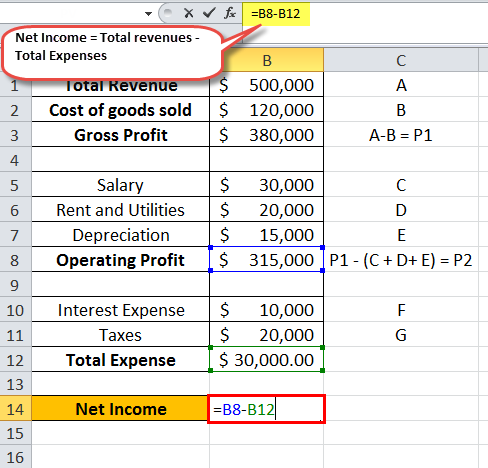

In [65]:
Image(filename='Netincome.png') 

In [66]:
dfs.head()

,Invoice ID,Branch,City,Customer type,Gender,Productline,Unitprice,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,grossmargin percentage,grossincome,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1.0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,3.0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3.0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1.0
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2.0


In [84]:
# cursor.execute('''select produk.product_line, sum(penjualan.jumlah_pembelian) as total
#                 from produk join penjualan on produk.id_produk = penjualan.id_produk 
#                 where strftime('%m', penjualan.tanggal_transaksi) = "01" 
#                 group by produk.product_line 
#                 order by total asc''')
# data = []
# for row in cursor.fetchall():
#     data.append(row)

# np_data = np.array(data)

# print(np_data)

# # objects = [x for x in np_data[:,0]]
# # performance = [x for x in np_data[:,1]]
# # y_pos = np.arange(len([x for x in np_data[:,0]]))
# # plt.ylabel('Total')
# # plt.bar(objects, performance, align='center', alpha=0.5)
# # plt.xticks(y_pos, objects, rotation = '90')
# # plt.title('Total penjualan bulan januari')
# # plt.margins(x=0)
# # plt.show()

# # df = pd.DataFrame([ x for x in np_data[:,:]])
# # df.columns = ['Kategori', 'Total penjualan']
# # df.index = np.arange(1,len(df)+1)
# # df

[]


In [67]:
dfs['Date'] = pd.to_datetime(dfs.Date)

In [68]:
Month = dfs.Date.dt.month

cogs = dfs.cogs



print(Month) 


0      1
1      3
2      3
3      1
4      2
      ..
995    1
996    3
997    2
998    2
999    2
Name: Date, Length: 1000, dtype: int64


In [69]:
dfs.Date

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [70]:
jml_penjualan = dfs.groupby("Productline").sum()
jml_penjualans = dfs.groupby("Productline")["Quantity"].sum()
# jml_penjualan
jml_penjualans 


Productline
Electronic accessories    971
Fashion accessories       902
Food and beverages        952
Health and beauty         854
Home and lifestyle        911
Sports and travel         920
Name: Quantity, dtype: int64

In [71]:
x = jml_penjualan.index
y = jml_penjualan['Quantity']

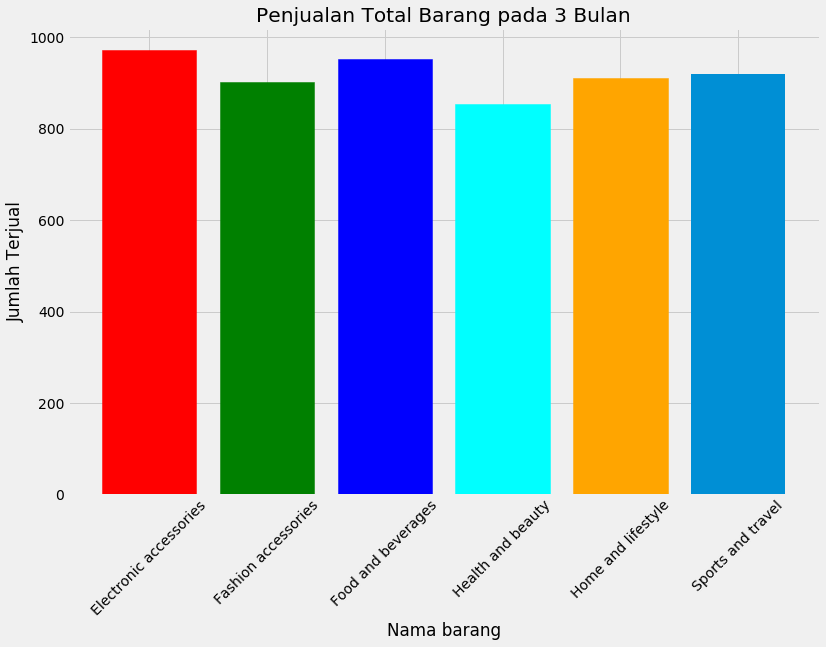

In [107]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.xlabel("Nama barang")
plt.ylabel("Jumlah Terjual")
plt.xticks(rotation = "45")
plt.title("Penjualan Total Barang pada 3 Bulan")
ax.bar(x,y)
# ax.plot([1, 2, 3])
# ax.legend((bar1, bar2, bar3), ('label1', 'label2', 'label3'))
ax.get_children()[0].set_color('red')
ax.get_children()[1].set_color('green')
ax.get_children()[2].set_color('blue')
ax.get_children()[3].set_color('cyan')
ax.get_children()[4].set_color('orange')
plt.show()

In [127]:
jml_penjualan_perbulan = dfs.groupby("Month").sum()
jml_penjualan_perbulans = dfs.groupby("Month")['Quantity']
jml_penjualan_perbulan

Month
1.0    1965
2.0    1647
3.0    1891
Name: Quantity, dtype: int64

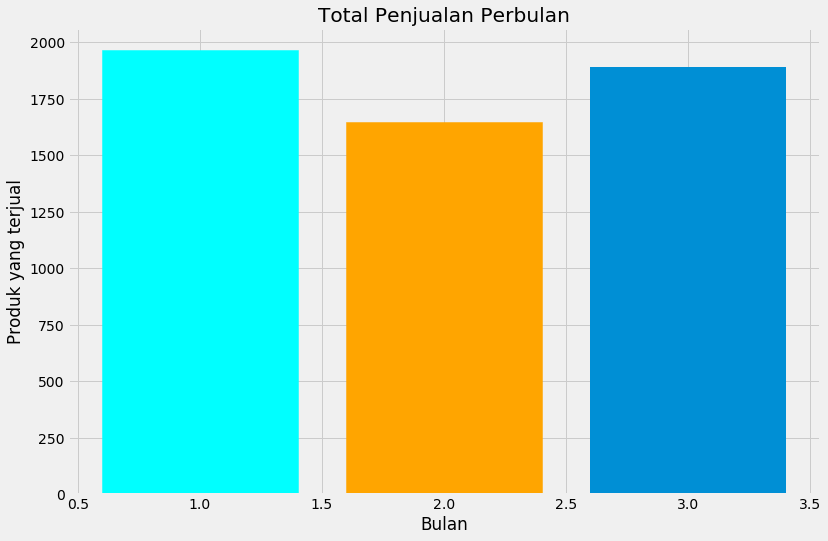

In [140]:
fig, ax = plt.subplots(figsize=(12, 8))
x = jml_penjualan_perbulan.index
y = jml_penjualan_perbulan['Quantity']
plt.title("Total Penjualan Perbulan")
plt.ylabel("Produk yang terjual")
plt.xlabel("Bulan")

ax.bar(x,y)
ax.get_children()[0].set_color('cyan')
ax.get_children()[1].set_color('orange')
plt.show()




In [138]:
Labakotor = dfs.groupby("Month").sum()
Labakotors = dfs.groupby("Month")["grossincome"].sum()
Labakotors

Month
1.0    5537.708
2.0    4598.575
3.0    5212.167
Name: grossincome, dtype: float64

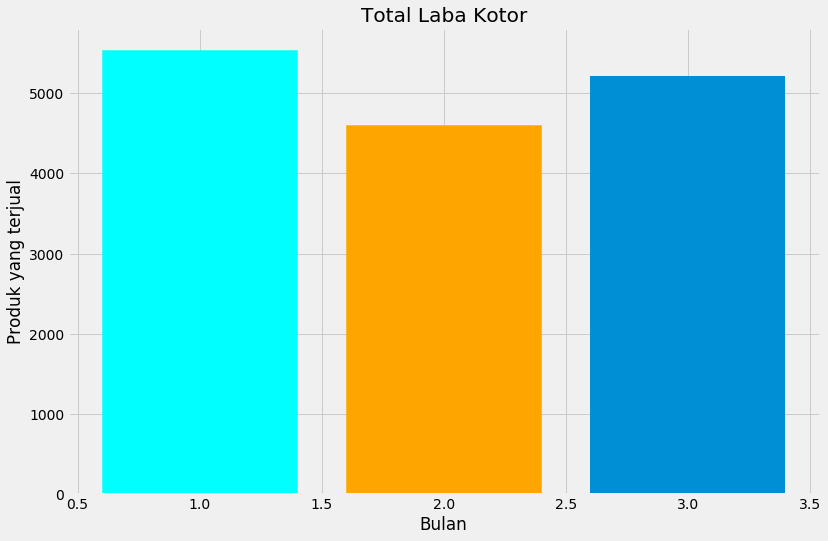

In [142]:
fig, ax = plt.subplots(figsize=(12, 8))
x = jml_penjualan_perbulan.index
y = jml_penjualan_perbulan['grossincome']
plt.title("Total Laba Kotor")
plt.ylabel("Produk yang terjual")
plt.xlabel("Bulan")

ax.bar(x,y)
ax.get_children()[0].set_color('cyan')
ax.get_children()[1].set_color('orange')
plt.show()




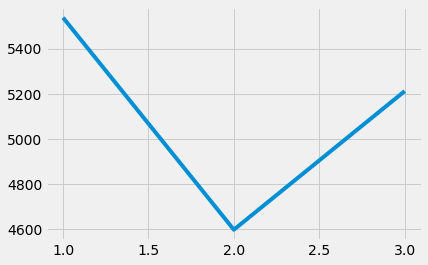

In [77]:
plt.plot(Labakotor)